In [1]:
import json
import csv
import pandas as pd
import sqlite3
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

Feature_Engineering.ipynb        collection_gas_fee_sync.ipynb
GM_buy_sell_diff.ipynb           collection_price_sync.ipynb
GM_tail_distribution.ipynb       gas_fee_analysis.ipynb
GM_trade_price_clustering.ipynb  general_market_analyses.ipynb
GM_trade_size_by_account.ipynb   general_price_analyses.ipynb
all_token.ipynb                  nft_database_research.db
all_wallet.ipynb                 reference.ipynb


In [3]:
conn = sqlite3.connect('nft_database_research.db')
c = conn.cursor()

In [4]:
df_all_transactions = pd.read_sql_query("SELECT * from combined_table_new", conn)
df_all_transactions.head()

,block_timestamp,transaction_hash,transaction_index,value,token_address,token_id,from_address,to_address,collection_name,price,date,gas_usd,gas_eth,eth_usd
0,2022-06-27 10:39:48+00:00,0x8b6e56011e0edd2b49c7d82ddc5e91a069b9ffb79091...,42,0.00,0x059edd72cd353df5106d2b9cc5ab83a52287ac3a,4367,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,0x2f2f237d2e655cc0a6f6fef761e5aef13087e71f,ArtBlocks,0.0000,2022-06-27 00:00:00,2.913307,0.002441,"1,190.87"
1,2022-06-27 10:39:48+00:00,0x8b6e56011e0edd2b49c7d82ddc5e91a069b9ffb79091...,42,0.00,0x059edd72cd353df5106d2b9cc5ab83a52287ac3a,2000336,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,0x2f2f237d2e655cc0a6f6fef761e5aef13087e71f,ArtBlocks,0.0000,2022-06-27 00:00:00,2.913307,0.002441,"1,190.87"
2,2022-06-27 10:39:48+00:00,0x8b6e56011e0edd2b49c7d82ddc5e91a069b9ffb79091...,42,0.00,0x059edd72cd353df5106d2b9cc5ab83a52287ac3a,1000093,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,0x2f2f237d2e655cc0a6f6fef761e5aef13087e71f,ArtBlocks,0.0000,2022-06-27 00:00:00,2.913307,0.002441,"1,190.87"
3,2022-06-27 10:19:29+00:00,0x4b85ce18821a189326a680236225e5256f1099ae0690...,209,0.00,0x059edd72cd353df5106d2b9cc5ab83a52287ac3a,1633,0x9106b49a05f842b58d56f8a5aea404d654867e26,0xceea2f1f8f784a9822a24a18a6eaab2eaa3c9d09,ArtBlocks,0.0000,2022-06-27 00:00:00,2.913307,0.002441,"1,190.87"
4,2022-06-27 03:51:41+00:00,0x18bea1335bcca84c2e0558082a35be88853b68259f6d...,385,10.99,0x059edd72cd353df5106d2b9cc5ab83a52287ac3a,5619,0x802fa804b97ccef82331243feb6ba56c9b4281e0,0xbfa896b3ce38d74b6be5144ee00f15521cc5f432,ArtBlocks,13087.6613,2022-06-27 00:00:00,2.913307,0.002441,"1,190.87"


In [5]:
print("num transactions:", df_all_transactions.shape[0])

num transactions: 492591


In [6]:
df_all_wallets = pd.read_sql_query("SELECT * from all_wallets", conn)
df_all_wallets.head()

,address
0,0x36a5bc205df1ed65c86301022cfc343a6ce546ff
1,0x9106b49a05f842b58d56f8a5aea404d654867e26
2,0x802fa804b97ccef82331243feb6ba56c9b4281e0
3,0x9a3c2b6eeaa38ffb167abdd1b87dfa8d32845a9d
4,0xcb43971645190ca9181f26e4f40eade20d51f39f


In [8]:
print("num wallets:", df_all_wallets.shape[0])

num wallets: 123932


## Trade price clustering analysis

assign a round value to each price and visualize the distribution.

In [11]:
df_prices = df_all_transactions[['block_timestamp','value']].groupby('value').count()
df_prices['value'] = df_prices.index
df_prices['round'] = df_prices['value'].round()
df_prices

,block_timestamp,value,round
value,,,
0.000000e+00,309898,0.000000e+00,0.0
2.000000e-18,2,2.000000e-18,0.0
4.000000e-17,1,4.000000e-17,0.0
6.900000e-17,2,6.900000e-17,0.0
1.220000e-16,4,1.220000e-16,0.0
...,...,...,...
6.223000e+03,1,6.223000e+03,6223.0
6.350000e+03,1,6.350000e+03,6350.0
6.472000e+03,1,6.472000e+03,6472.0


In [12]:
df_prices.describe()

,block_timestamp,value,round
count,14137.000000,14137.000000,14137.000000
mean,34.844097,45.272218,45.268798
std,2610.004321,270.970542,270.973956
min,1.000000,0.000000,0.000000
25%,1.000000,3.269000,3.000000
50%,2.000000,8.999980,9.000000
75%,5.000000,30.500000,30.000000
max,309898.000000,15000.000000,15000.000000


Distribution of count of values.

         value
round         
0.0        759
1.0       1038
2.0        896
3.0       1005
4.0        768
...        ...
6223.0       1
6350.0       1
6472.0       1
8000.0       1
15000.0      1

[443 rows x 1 columns]


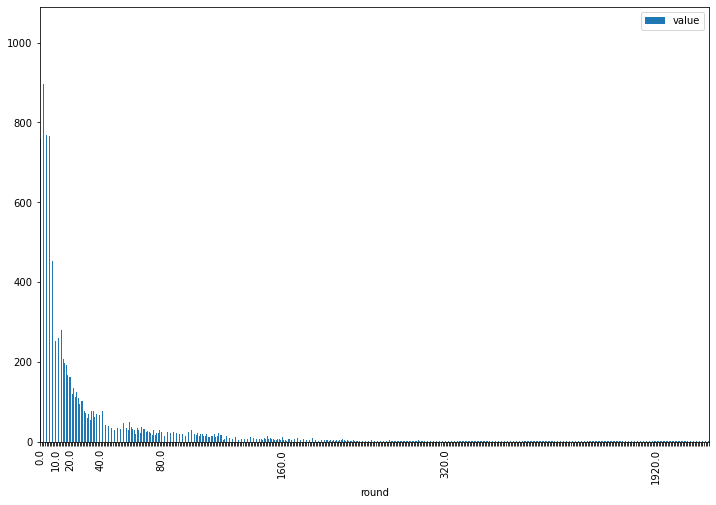

In [13]:
df_price_round = df_prices[['value','round']].groupby('round').count()
print(df_price_round)
ax = df_price_round.plot(kind='bar',figsize=(12,8))
base = 5
for n,label in enumerate(ax.xaxis.get_ticklabels()):
    if float(str(label).split("'")[-2]) % base != 0.0:
        label.set_visible(False)
    else:
        base = base * 2

Distribution of percentage.

         value      freq    round
round                            
0.0        759  0.053689      0.0
1.0       1038  0.073424      1.0
2.0        896  0.063380      2.0
3.0       1005  0.071090      3.0
4.0        768  0.054326      4.0
...        ...       ...      ...
6223.0       1  0.000071   6223.0
6350.0       1  0.000071   6350.0
6472.0       1  0.000071   6472.0
8000.0       1  0.000071   8000.0
15000.0      1  0.000071  15000.0

[443 rows x 3 columns]


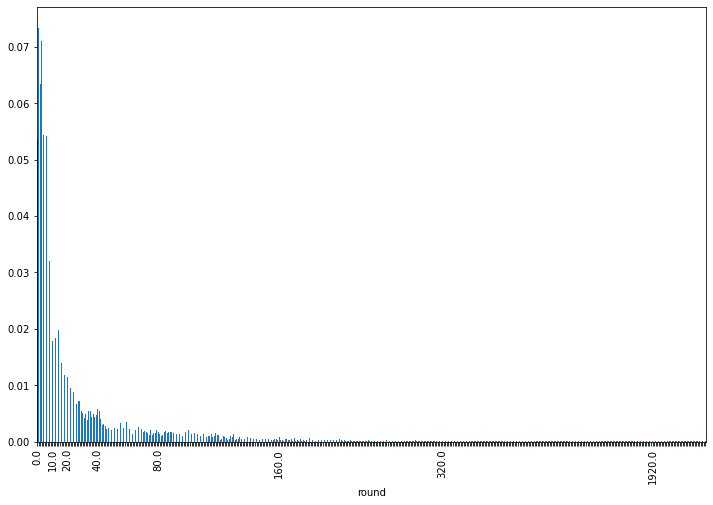

In [12]:
df_price_round_fq = df_prices[['value','round']].groupby('round').count()
df_price_round_fq['freq'] = df_price_round_fq['value']/df_price_round_fq['value'].sum()
df_price_round_fq['round'] = df_price_round_fq.index
print(df_price_round_fq)
ax = df_price_round_fq['freq'].plot(kind='bar',figsize=(12,8))
base = 5
for n,label in enumerate(ax.xaxis.get_ticklabels()):
    if float(str(label).split("'")[-2]) % base != 0.0:
        label.set_visible(False)
    else:
        base = base * 2

In [14]:
df_prices['round_val'] = df_prices['value'].apply(lambda x : x.is_integer())
df_prices

,block_timestamp,value,round,round_val
value,,,,
0.000000e+00,309898,0.000000e+00,0.0,True
2.000000e-18,2,2.000000e-18,0.0,False
4.000000e-17,1,4.000000e-17,0.0,False
6.900000e-17,2,6.900000e-17,0.0,False
1.220000e-16,4,1.220000e-16,0.0,False
...,...,...,...,...
6.223000e+03,1,6.223000e+03,6223.0,True
6.350000e+03,1,6.350000e+03,6350.0,False
6.472000e+03,1,6.472000e+03,6472.0,True


In [18]:
df_prices['round_val'].value_counts()

False    13775
True       362
Name: round_val, dtype: int64

In [15]:
df_round_group = df_prices[['round','round_val','value']].groupby(['round','round_val']).count()
df_round_group.head(20)

value
round round_val       
0.0   False        758
      True           1
1.0   False       1037
      True           1
2.0   False        895
      True           1
3.0   False       1004
      True           1
4.0   False        767
      True           1
5.0   False        680
      True           1
6.0   False        764
      True           1
7.0   False        487
      True           1
8.0   False        453
      True           1
9.0   False        354
      True           1

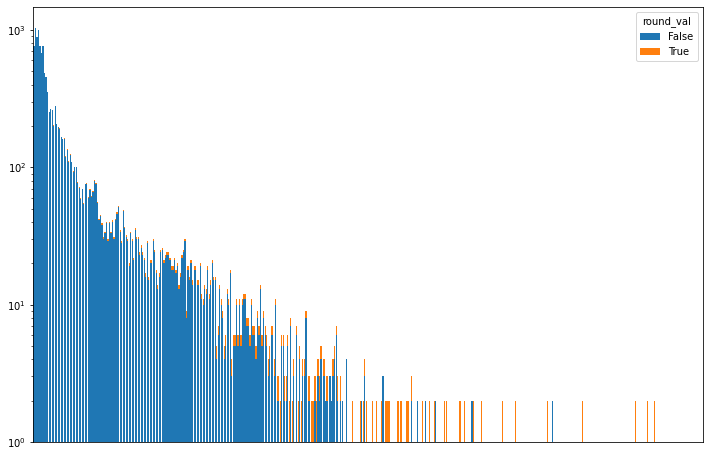

In [19]:
ax = pd.crosstab(df_prices['round'],df_prices['round_val']).plot.bar(figsize=(12,8),stacked=True,log=True,width = 0.8)
ax.get_xaxis().set_visible(False)

### conclusion:

1. most trades cluster around decimal numbers instead of round ones, which could be a special feature for the NFT market.  
2. price distribution also has the feature that most trades clustered around lower price, indicating that extremely high prices can be indicators for market manipulation.